In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Dataset information
data_details = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/social_media_fake_account_detection/fake_account__data_dict.csv')
data_details

,No.,Column name,Data Type,Description
0,0,'profile_pic',categorical,Whether the account has a profile picture (1) ...
1,1,'ratio_numlen_username',numerical (float),Ratio of numeric characters in the account use...
2,2,'len_fullname',numerical (int),Number of characters in the user's full name
3,3,'ratio_numlen_fullname',numerical (float),Ratio of numeric characters in the user's full...
4,4,'sim_name_username',categorical,Whether the user's name matches their username...
5,5,'len_desc',numerical (int),Number of characters in the account description
6,6,'extern_url',categorical,Whether the account description includes a URL...
7,7,'private',categorical,Whether the user's posts are visible only to t...
8,8,'num_posts',numerical (int),Number of posts in the user account
9,9,'num_followers',numerical (int),Number of Instagram users following the account


In [ ]:
# Data loading
data_path = '/content/drive/MyDrive/Colab Notebooks/social_media_fake_account_detection/social_media_train.csv'

df = pd.read_csv(data_path,index_col=[0])
df.head()

,fake,profile_pic,ratio_numlen_username,len_fullname,ratio_numlen_fullname,sim_name_username,len_desc,extern_url,private,num_posts,num_followers,num_following
0,0,Yes,0.27,0,0.0,No match,53,No,No,32,1000,955
1,0,Yes,0.00,2,0.0,Partial match,44,No,No,286,2740,533
2,0,Yes,0.10,2,0.0,Partial match,0,No,Yes,13,159,98
3,0,Yes,0.00,1,0.0,Partial match,82,No,No,679,414,651
4,0,Yes,0.00,2,0.0,No match,0,No,Yes,6,151,126


In [ ]:
# ETL Process
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 576 entries, 0 to 575
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   fake                   576 non-null    int64  
 1   profile_pic            576 non-null    object 
 2   ratio_numlen_username  576 non-null    float64
 3   len_fullname           576 non-null    int64  
 4   ratio_numlen_fullname  576 non-null    float64
 5   sim_name_username      576 non-null    object 
 6   len_desc               576 non-null    int64  
 7   extern_url             576 non-null    object 
 8   private                576 non-null    object 
 9   num_posts              576 non-null    int64  
 10  num_followers          576 non-null    int64  
 11  num_following          576 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 58.5+ KB


In [ ]:
df.isnull().sum()

,0
fake,0
profile_pic,0
ratio_numlen_username,0
len_fullname,0
ratio_numlen_fullname,0
sim_name_username,0
len_desc,0
extern_url,0
private,0
num_posts,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
# Split Data with datatype
df_num = df.select_dtypes(include='number')
df_cat = df.select_dtypes(include='object')
df_num.head()

,fake,ratio_numlen_username,len_fullname,ratio_numlen_fullname,len_desc,num_posts,num_followers,num_following
0,0,0.27,0,0.0,53,32,1000,955
1,0,0.00,2,0.0,44,286,2740,533
2,0,0.10,2,0.0,0,13,159,98
3,0,0.00,1,0.0,82,679,414,651
4,0,0.00,2,0.0,0,6,151,126


In [ ]:
df_cat.head()

,profile_pic,sim_name_username,extern_url,private
0,Yes,No match,No,No
1,Yes,Partial match,No,No
2,Yes,Partial match,No,Yes
3,Yes,Partial match,No,No
4,Yes,No match,No,Yes


In [ ]:
# EDA Process
df_num.describe()

,fake,ratio_numlen_username,len_fullname,ratio_numlen_fullname,len_desc,num_posts,num_followers,num_following
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,5.760000e+02,576.000000
mean,0.500000,0.163837,1.460069,0.036094,22.623264,107.489583,8.530724e+04,508.381944
std,0.500435,0.214096,1.052601,0.125121,37.702987,402.034431,9.101485e+05,917.981239
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,3.900000e+01,57.500000
50%,0.500000,0.000000,1.000000,0.000000,0.000000,9.000000,1.505000e+02,229.500000
75%,1.000000,0.310000,2.000000,0.000000,34.000000,81.500000,7.160000e+02,589.500000
max,1.000000,0.920000,12.000000,1.000000,150.000000,7389.000000,1.533854e+07,7500.000000


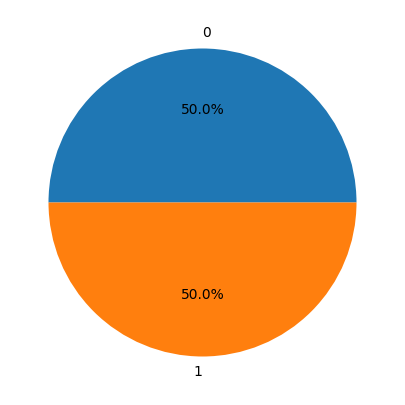

In [ ]:
plt.figure(figsize=(6,5))
plt.pie(df['fake'].value_counts(),labels=df['fake'].value_counts().index,autopct='%1.1f%%')
plt.show()

In [ ]:
df['profile_pic'].value_counts()

,count
profile_pic,
Yes,404
No,172


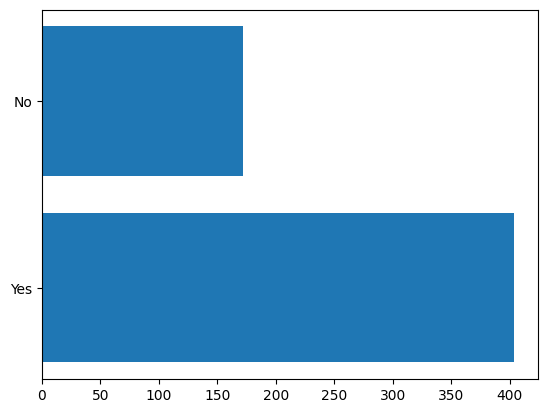

In [ ]:
plt.barh(df['profile_pic'].value_counts().index,df['profile_pic'].value_counts().values)
plt.show()

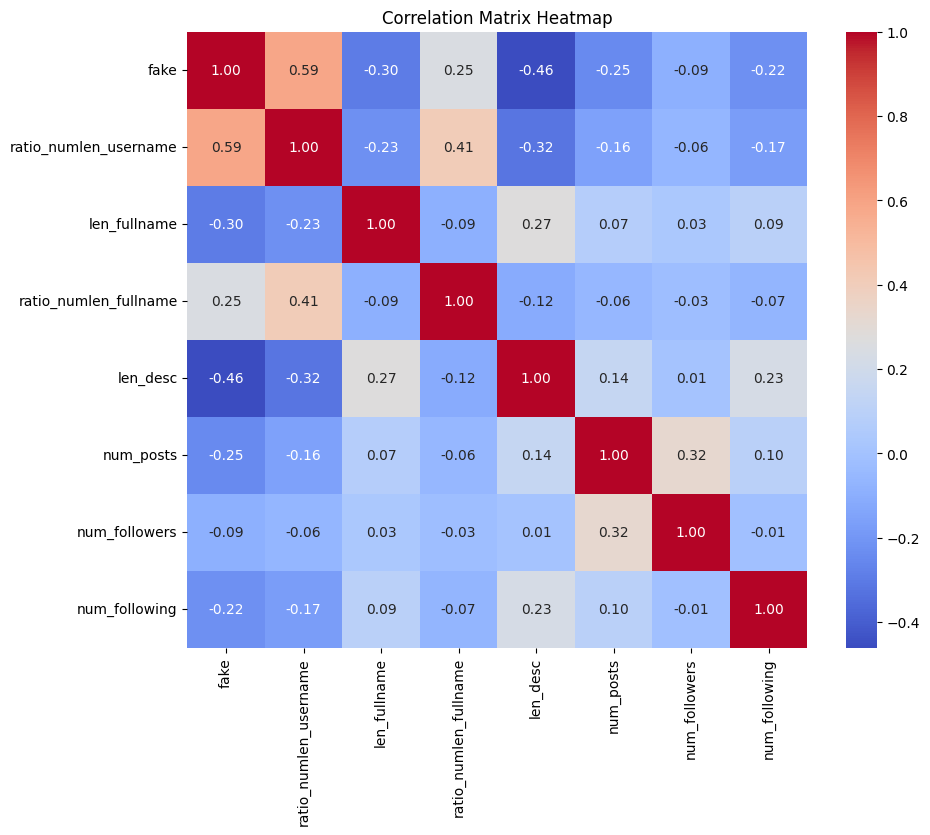

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_num.corr(), annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

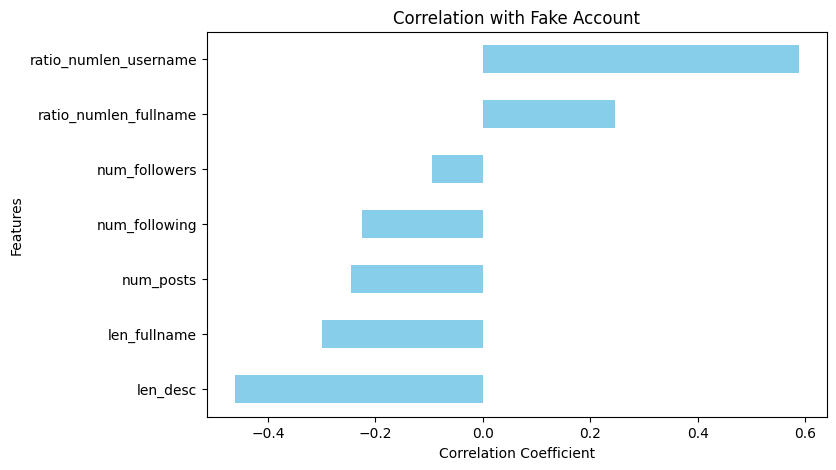

In [ ]:
correlation_with_fake = df_num.corr()['fake'].drop('fake')
correlation_with_fake.sort_values().plot(kind='barh', figsize=(8, 5), color='skyblue')
plt.title('Correlation with Fake Account')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()

In [ ]:
# Relationship between 'private' and 'fake'
print("Private vs Fake:")
print(df.groupby('private')['fake'].value_counts(normalize=True))

Private vs Fake:
private  fake
No       1       0.511236
         0       0.488764
Yes      0       0.518182
         1       0.481818
Name: proportion, dtype: float64


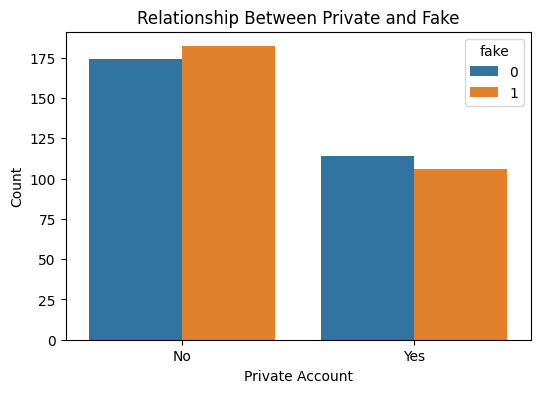

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='private', hue='fake', data=df)
plt.title('Relationship Between Private and Fake')
plt.xlabel('Private Account')
plt.ylabel('Count')
plt.show()

Profile Pic vs Fake:
profile_pic  fake
No           1       0.988372
             0       0.011628
Yes          0       0.707921
             1       0.292079
Name: proportion, dtype: float64


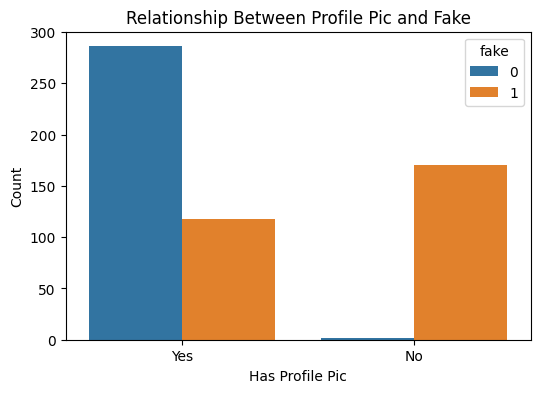

In [ ]:
# Relationship between 'profile_pic' and 'fake'
print("Profile Pic vs Fake:")
print(df.groupby('profile_pic')['fake'].value_counts(normalize=True))

# Plot Profile Pic vs Fake
plt.figure(figsize=(6, 4))
sns.countplot(x='profile_pic', hue='fake', data=df)
plt.title('Relationship Between Profile Pic and Fake')
plt.xlabel('Has Profile Pic')
plt.ylabel('Count')
plt.show()

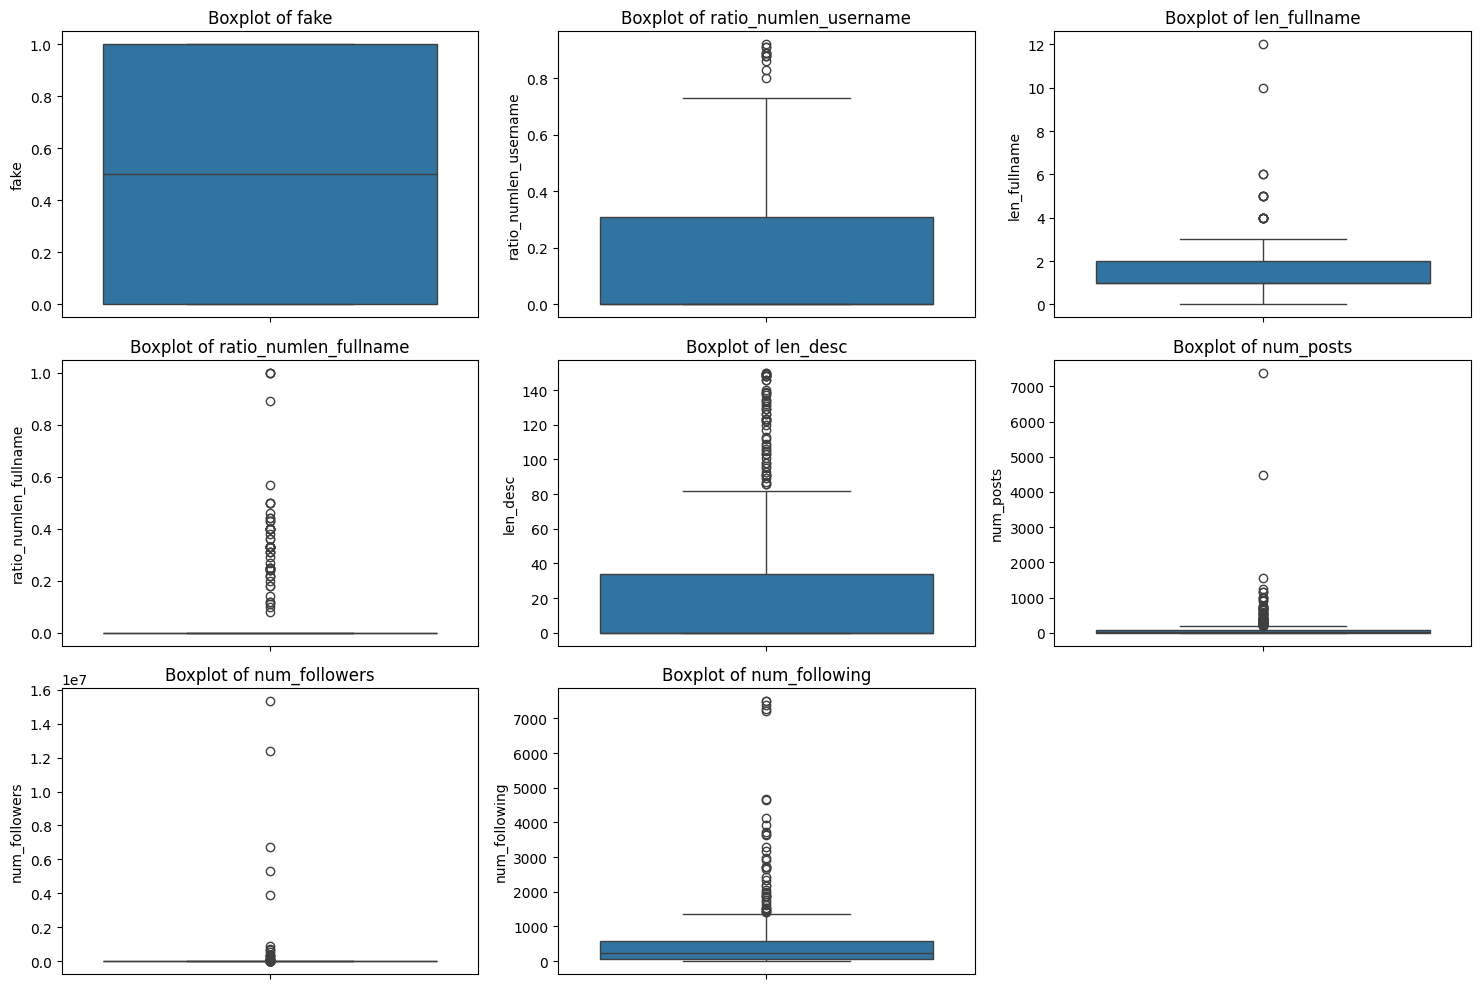

In [ ]:
plt.figure(figsize=(15, 10))
numerical_cols = df_num.columns
for i, col in enumerate(numerical_cols, start=1):
    plt.subplot(3, 3, i)
    sns.boxplot(df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [ ]:
print(df_cat.nunique())

profile_pic          2
sim_name_username    3
extern_url           2
private              2
dtype: int64


In [ ]:
# Data Preprocessing
for col in df_cat.columns:
    df[col] = LabelEncoder().fit_transform(df[col])

In [ ]:
df.head()

,fake,profile_pic,ratio_numlen_username,len_fullname,ratio_numlen_fullname,sim_name_username,len_desc,extern_url,private,num_posts,num_followers,num_following
0,0,1,0.27,0,0.0,1,53,0,0,32,1000,955
1,0,1,0.00,2,0.0,2,44,0,0,286,2740,533
2,0,1,0.10,2,0.0,2,0,0,1,13,159,98
3,0,1,0.00,1,0.0,2,82,0,0,679,414,651
4,0,1,0.00,2,0.0,1,0,0,1,6,151,126


In [ ]:
# Split Features and Target
X = df.drop('fake',axis=1)
y = df['fake']

In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Verify splits
print("Training Set Shape:", X_train.shape, y_train.shape)
print("Testing Set Shape:", X_test.shape, y_test.shape)

Training Set Shape: (460, 11) (460,)
Testing Set Shape: (116, 11) (116,)


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Build and Train ML Model

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Model Optimization
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='f1', verbose=1)
grid_rf.fit(X_train, y_train)

# Display best parameters
print("Best Parameters for Random Forest:", grid_rf.best_params_)

# Evaluate on test set
y_pred_rf = grid_rf.best_estimator_.predict(X_test)
print("Random Forest (Tuned) Performance:")
print(classification_report(y_test, y_pred_rf))

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}
Random Forest (Tuned) Performance:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        58
           1       0.91      0.91      0.91        58

    accuracy                           0.91       116
   macro avg       0.91      0.91      0.91       116
weighted avg       0.91      0.91      0.91       116



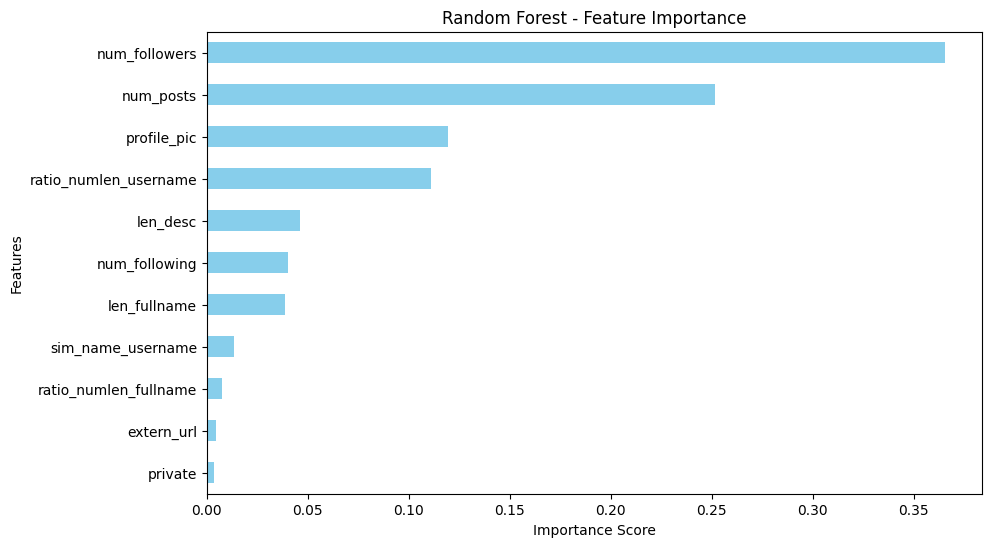

In [ ]:
# Extract the best Random Forest model
best_rf_model = grid_rf.best_estimator_

# Get feature importances
feature_importances_rf = best_rf_model.feature_importances_

# Create a pandas Series for easy visualization
importances_df = pd.Series(feature_importances_rf, index=X.columns).sort_values()

# Plot the feature importances
importances_df.plot(kind='barh', color='skyblue', figsize=(10, 6))
plt.title("Random Forest - Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

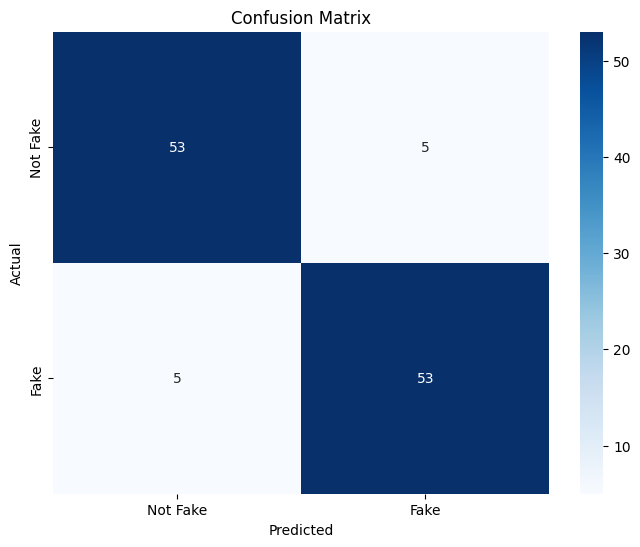

In [ ]:
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fake', 'Fake'], yticklabels=['Not Fake', 'Fake'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()